In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

import xgboost as xgb
import lightgbm as lgb
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def load_and_explore_data(file_path):
    """Load data and perform initial exploration"""
    # Load training data
    train_data = pd.read_csv(file_path)

    print("Dataset Shape:", train_data.shape)
    print("\nColumn Names:")
    print(train_data.columns.tolist())
    print("\nFirst few rows:")
    print(train_data.head())
    print("\nTarget Variable Distribution:")
    print(train_data['next_month_default'].value_counts())
    print("\nClass Imbalance Ratio:")
    print(train_data['next_month_default'].value_counts(normalize=True))

    return train_data

In [ ]:
df = load_and_explore_data(r"/content/train_dataset_final1.csv")

Dataset Shape: (25247, 27)

Column Names:
['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']

First few rows:
   Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2 

In [ ]:
df.head(10)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,5022,1,1,1,80000,35.0,-1,2,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0
6,5023,1,0,2,200000,37.0,-1,-1,0,-1,...,10712.01,19312.98,9455.13,15306.21,7055.30,10700.16,12388.83,15185.33,0.81,0
7,5024,3,1,2,50000,24.0,0,0,0,0,...,5651.27,1600.15,6207.28,1464.87,2199.89,1000.26,3000.16,21055.33,0.12,0
8,5025,1,1,3,50000,44.0,0,0,0,0,...,9001.04,1761.95,2311.19,2200.21,176.18,180.19,9769.14,35039.67,0.08,0
9,5026,2,1,1,440000,NaN,0,-1,-1,-2,...,11350.05,8998.93,0.00,0.00,10960.93,502.87,448.09,9569.17,0.36,0


#EDA


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [ ]:
df.shape

(25121, 27)

In [ ]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,2.512100e+04,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000
mean,17639.804546,1.551769,0.604713,1.851996,168358.823295,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,...,38826.942991,5720.009051,6.049572e+03,5277.919404,4870.517761,4897.474273,5255.708318,44893.019852,0.362015,0.190438
std,7283.872392,0.522538,0.488922,0.797132,129866.750911,9.174998,1.099224,1.174062,1.172957,1.147502,...,59200.095746,16825.574803,2.404039e+04,17756.149651,16008.327381,15767.155170,17893.903811,62878.301243,5.058260,0.392655
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11334.000000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1239.370000,999.980000,9.198500e+02,399.180000,300.120000,258.100000,129.760000,4850.330000,0.040000,0.000000
50%,17637.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17123.790000,2147.750000,2.027220e+03,1839.900000,1500.100000,1511.300000,1500.030000,21113.000000,0.090000,0.000000
75%,23947.000000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49250.340000,5032.770000,5.000200e+03,4601.220000,4015.220000,4099.810000,4018.750000,57176.330000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [ ]:
df.dtypes

,0
Customer_ID,int64
marriage,int64
sex,int64
education,int64
LIMIT_BAL,int64
age,float64
pay_0,int64
pay_2,int64
pay_3,int64
pay_4,int64


In [ ]:
df.duplicated().sum()

np.int64(0)

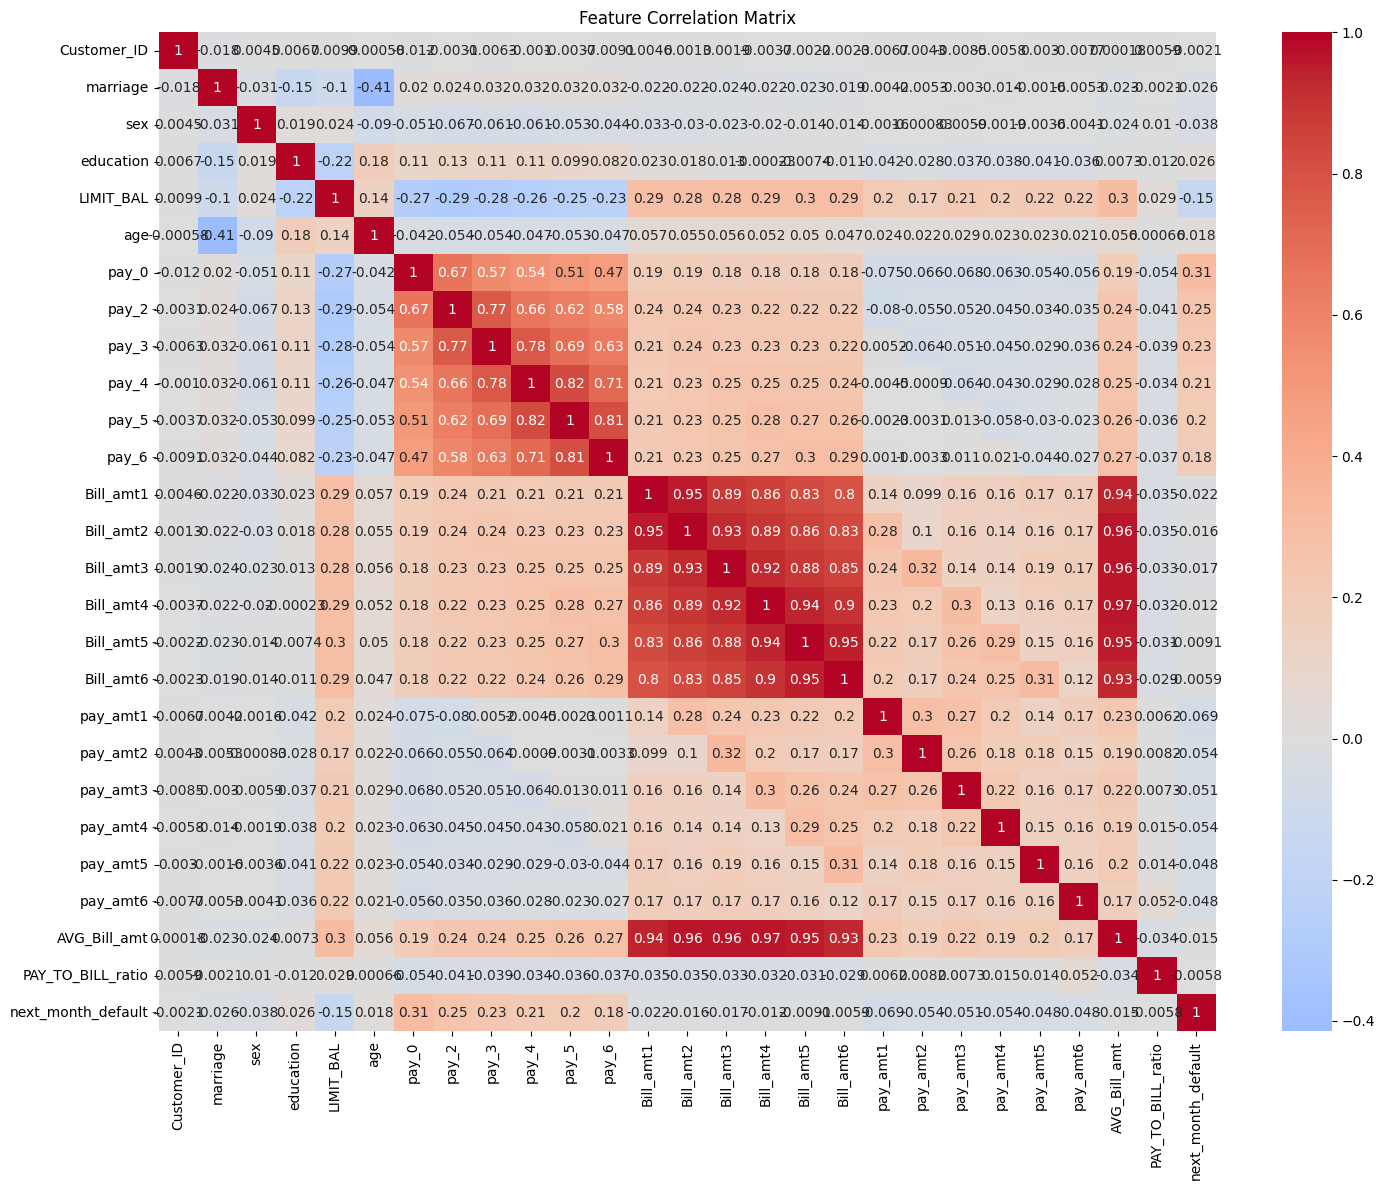

In [ ]:
#Correlation Analysis
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

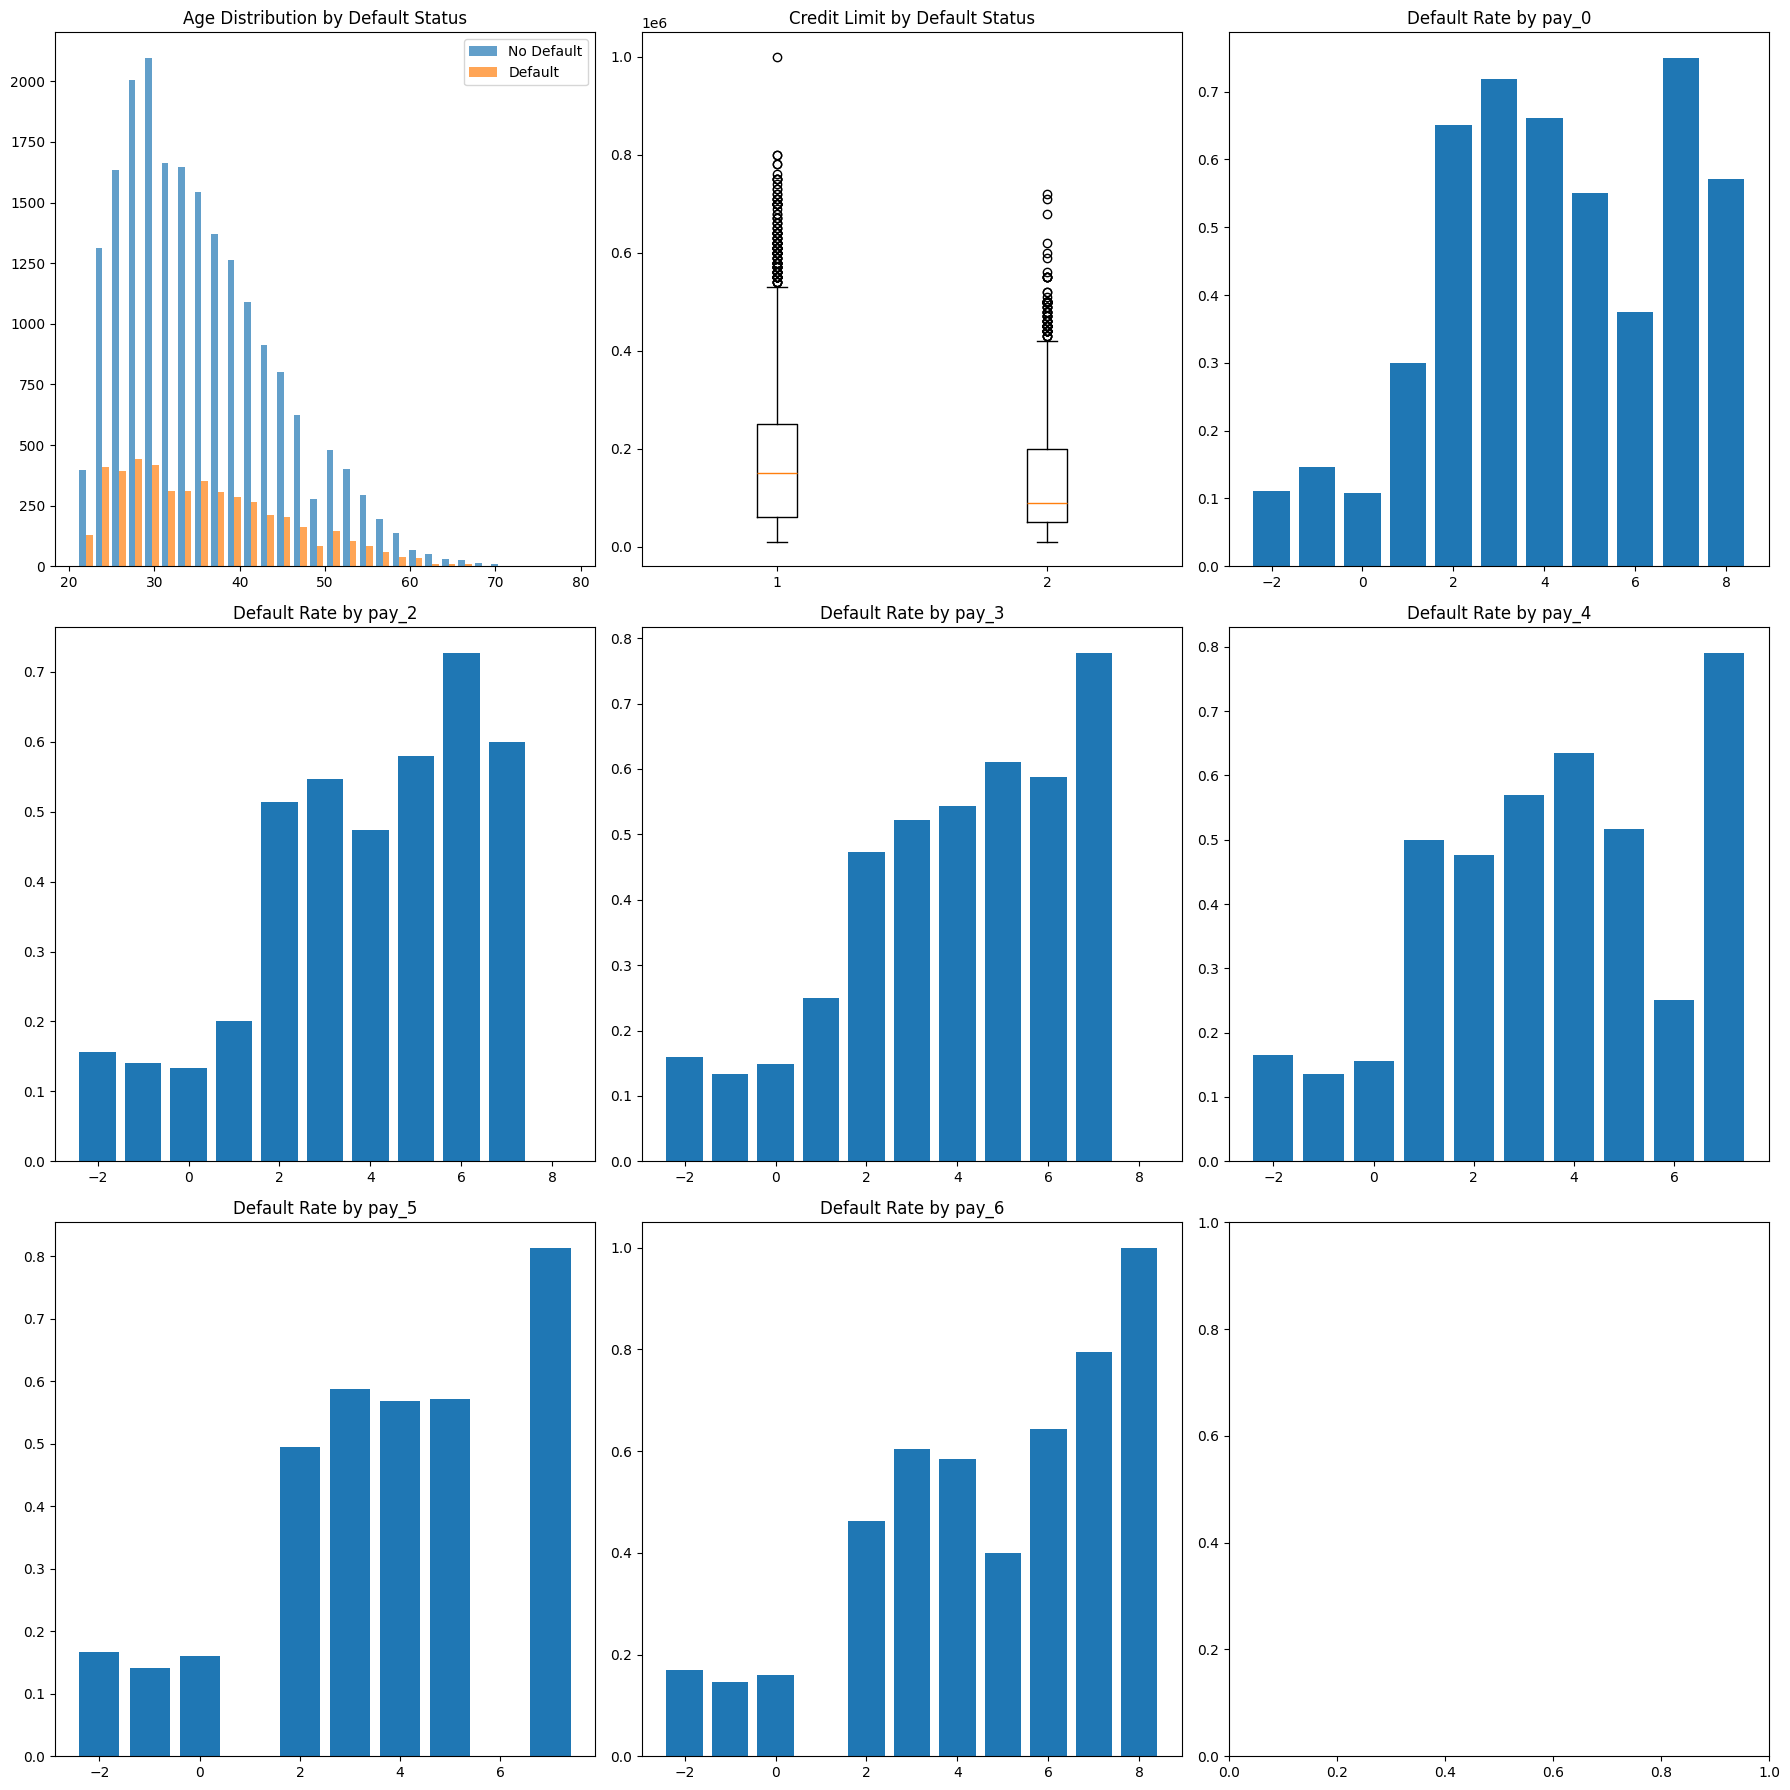

In [ ]:
def perform_eda(df):

    # Target variable analysis by key features
    fig, axes = plt.subplots(3, 3, figsize=(18, 18)) # Changed subplot grid to 3x3

    # Age distribution by default
    axes[0,0].hist([df[df['next_month_default']==0]['age'],
                    df[df['next_month_default']==1]['age']],
                   bins=30, alpha=0.7, label=['No Default', 'Default'])
    axes[0,0].set_title('Age Distribution by Default Status')
    axes[0,0].legend()

    # Credit limit distribution
    axes[0,1].boxplot([df[df['next_month_default']==0]['LIMIT_BAL'],
                       df[df['next_month_default']==1]['LIMIT_BAL']])
    axes[0,1].set_title('Credit Limit by Default Status')

    # Payment status analysis
    payment_cols = ['pay_0', 'pay_2','pay_3','pay_4','pay_5','pay_6']
    for i, col in enumerate(payment_cols[:6]):
        if i < 6:
            row = (i + 2) // 3
            col_idx = (i + 2) % 3
            default_rates = df.groupby(col)['next_month_default'].mean()
            axes[row, col_idx].bar(default_rates.index, default_rates.values)
            axes[row, col_idx].set_title(f'Default Rate by {col}')

    plt.tight_layout()
    plt.show()
perform_eda(df)

##Outlier Handling

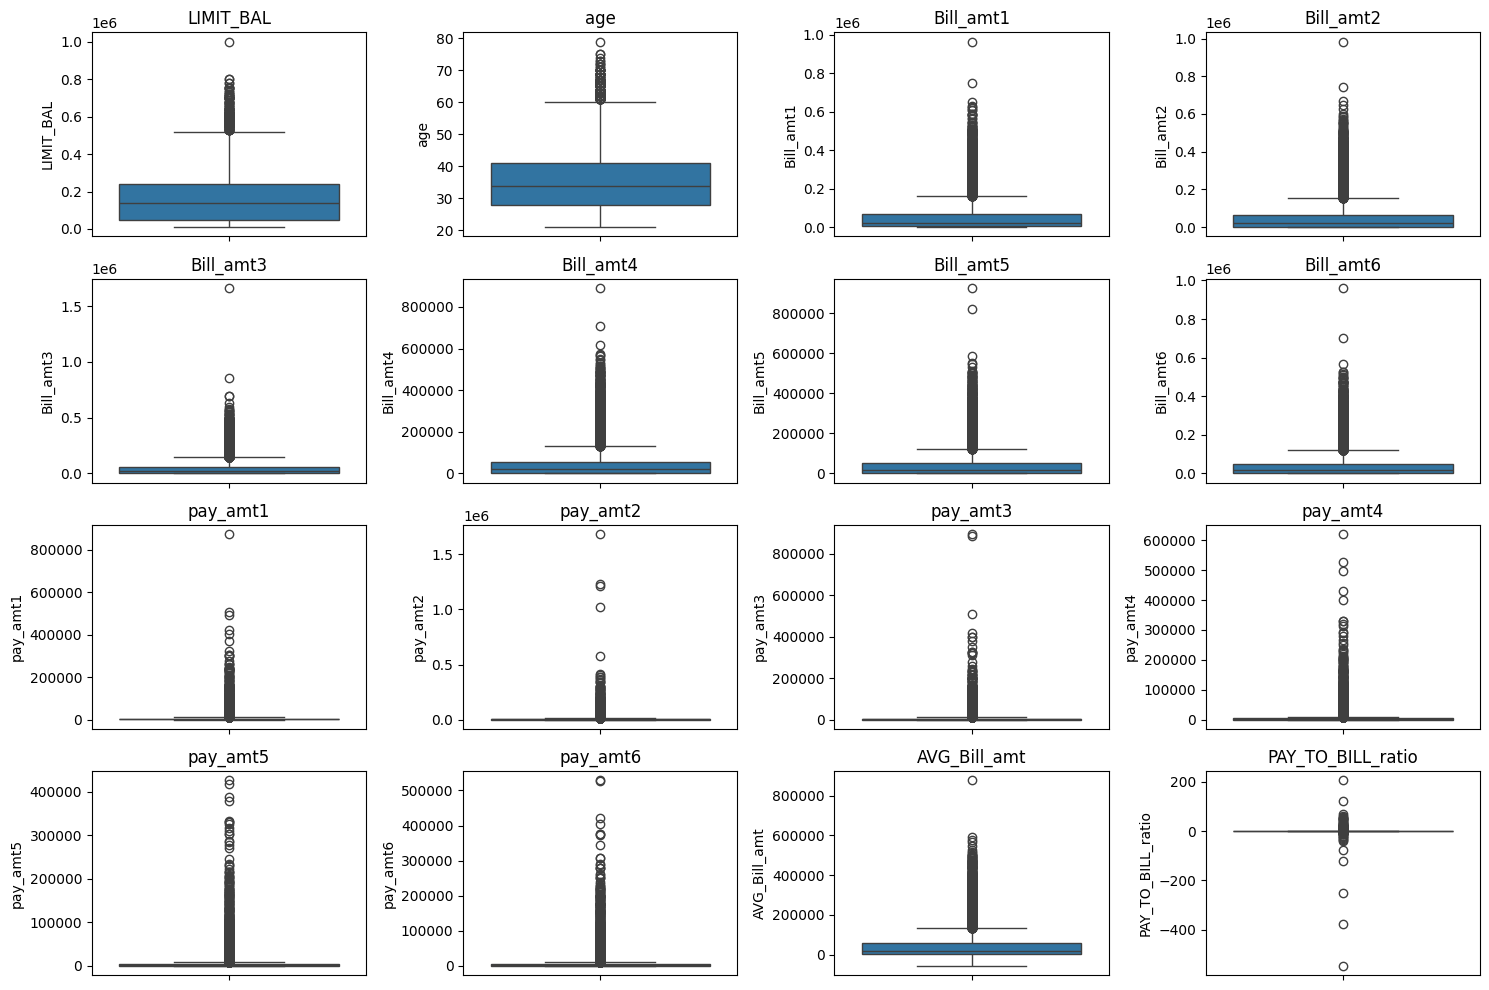

In [ ]:
numerical_cols = ['LIMIT_BAL', 'age', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                  'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','AVG_Bill_amt','PAY_TO_BILL_ratio']

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Changed subplot grid to 4x4
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: i want see how many outliers i am getting using iqr and also using z score for age, limit_bal,bill_amt and pay_amt, credit utilization and payment ratio. i dont want to remove them in this cell, just wanna check how many are there

def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

def count_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    outliers = df[abs(z_scores) > threshold]
    return len(outliers)

print("Outlier Count using IQR:")
for col in numerical_cols:
    if col in df.columns:
        outlier_count = count_outliers_iqr(df, col)
        print(f"  {col}: {outlier_count}")
    else:
        print(f"  Column '{col}' not found in DataFrame.")

print("\nOutlier Count using Z-score (threshold=3):")
for col in numerical_cols:
    if col in df.columns:
        outlier_count = count_outliers_zscore(df, col)
        print(f"  {col}: {outlier_count}")
    else:
        print(f"  Column '{col}' not found in DataFrame.")



Outlier Count using IQR:
  LIMIT_BAL: 148
  age: 217
  Bill_amt1: 1978
  Bill_amt2: 1977
  Bill_amt3: 2053
  Bill_amt4: 2191
  Bill_amt5: 2270
  Bill_amt6: 2238
  pay_amt1: 2294
  pay_amt2: 2357
  pay_amt3: 2165
  pay_amt4: 2534
  pay_amt5: 2486
  pay_amt6: 2494
  AVG_Bill_amt: 2150
  PAY_TO_BILL_ratio: 824

Outlier Count using Z-score (threshold=3):
  LIMIT_BAL: 118
  age: 136
  Bill_amt1: 566
  Bill_amt2: 544
  Bill_amt3: 536
  Bill_amt4: 555
  Bill_amt5: 526
  Bill_amt6: 523
  pay_amt1: 329
  pay_amt2: 254
  pay_amt3: 297
  pay_amt4: 332
  pay_amt5: 341
  pay_amt6: 370
  AVG_Bill_amt: 538
  PAY_TO_BILL_ratio: 47


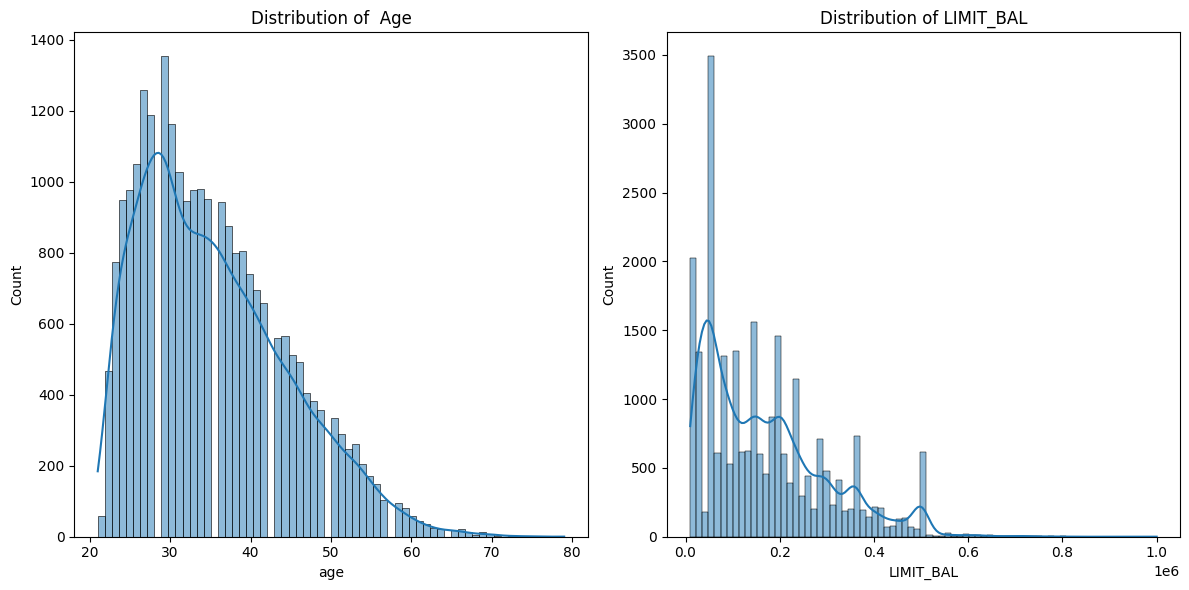

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['age'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of  Age')

sns.histplot(df['LIMIT_BAL'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of LIMIT_BAL')

plt.tight_layout()
plt.show()

In [ ]:
df1=df.copy()

In [ ]:
df1['age'] = df['age'].clip(lower=18, upper=80)

# LIMIT_BAL: Cap to 99th percentile or 1,000,000
limit_cap = min(df['LIMIT_BAL'].quantile(0.99), 1_000_000)
df1['LIMIT_BAL'] = df['LIMIT_BAL'].clip(upper=limit_cap)

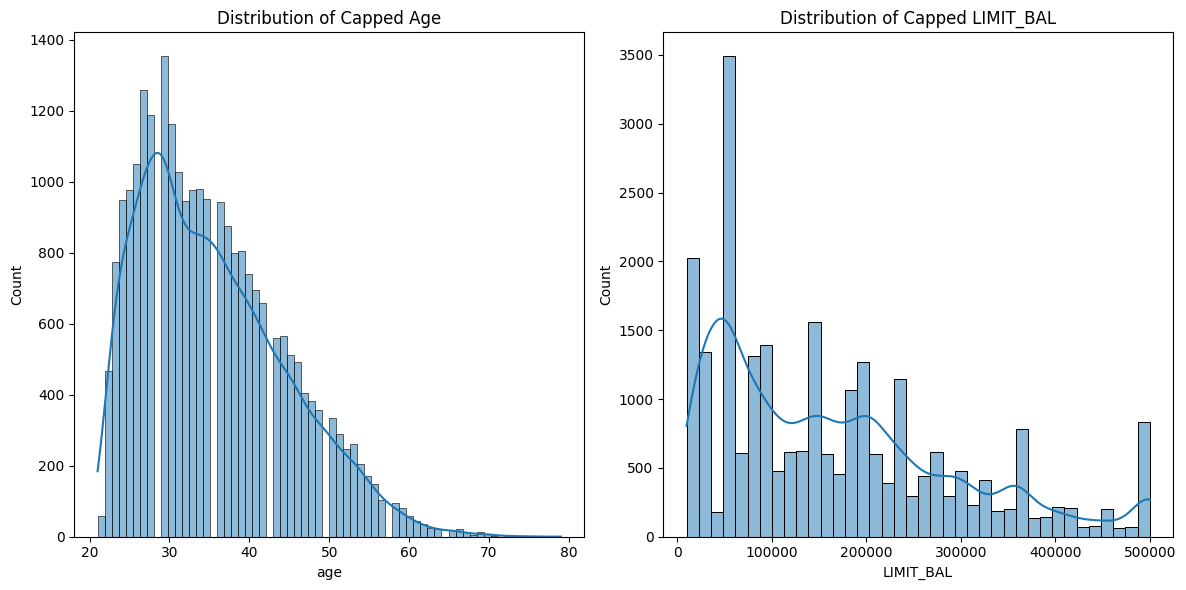

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df1['age'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Capped Age')

sns.histplot(df1['LIMIT_BAL'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Capped LIMIT_BAL')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize
winsorize_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
                  'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','AVG_Bill_amt','PAY_TO_BILL_ratio']
# Apply winsorization to each numeric column (1% each tail)
for col in winsorize_cols:
    df1[col] = winsorize(df[col], limits=[0.01, 0.01])
    print(f"\nColumn: {col}")
    print("Before winsorization:")
    print(df1[col].describe())
    print("After winsorization:")
    print(df1[f'{col}'].describe())



Column: Bill_amt1
Before winsorization:
count     25121.000000
mean      50391.302843
std       69046.075415
min           0.000000
25%        3599.630000
50%       22430.320000
75%       67414.050000
max      348937.580000
Name: Bill_amt1, dtype: float64
After winsorization:
count     25121.000000
mean      50391.302843
std       69046.075415
min           0.000000
25%        3599.630000
50%       22430.320000
75%       67414.050000
max      348937.580000
Name: Bill_amt1, dtype: float64

Column: Bill_amt2
Before winsorization:
count     25121.000000
mean      48303.470771
std       66366.884297
min           0.000000
25%        3002.470000
50%       21289.140000
75%       64224.440000
max      334953.720000
Name: Bill_amt2, dtype: float64
After winsorization:
count     25121.000000
mean      48303.470771
std       66366.884297
min           0.000000
25%        3002.470000
50%       21289.140000
75%       64224.440000
max      334953.720000
Name: Bill_amt2, dtype: float64

Column: Bil

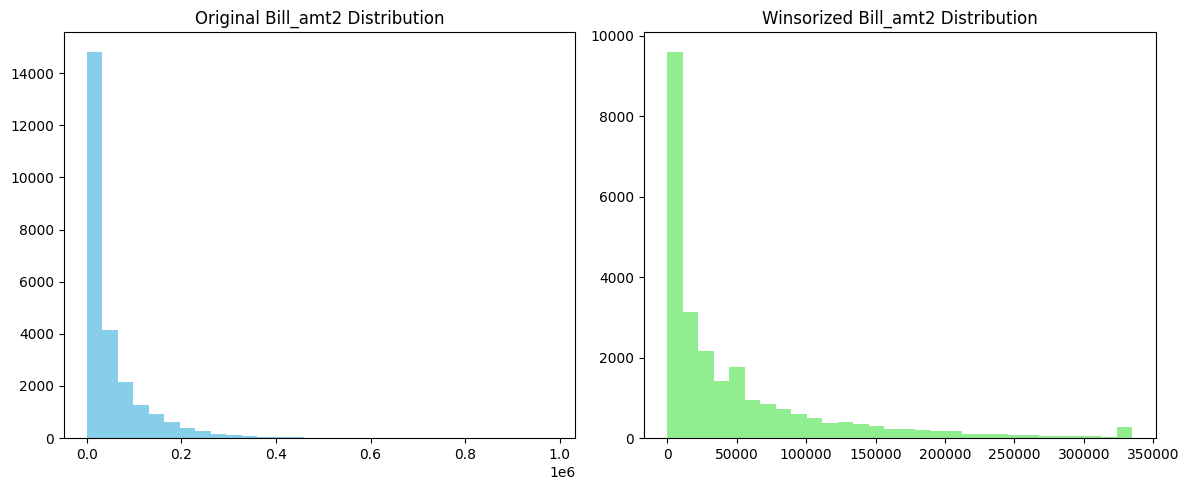

In [ ]:
import matplotlib.pyplot as plt
  # Change index to visualize a different column
col=winsorize_cols[1]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[col], bins=30, color='skyblue')
plt.title(f'Original {col} Distribution')
plt.subplot(1,2,2)
plt.hist(df1[f'{col}'], bins=30, color='lightgreen')
plt.title(f'Winsorized {col} Distribution')
plt.tight_layout()
plt.show()


In [ ]:
df1.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000
mean,17639.804546,1.551769,0.604713,1.851996,167629.154890,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,...,38058.305444,5076.824520,5204.469068,4602.537969,4279.793110,4276.851089,4609.883397,44131.276544,0.355831,0.190438
std,7283.872392,0.522538,0.488922,0.797132,127525.495329,9.174998,1.099224,1.174062,1.172957,1.147502,...,54971.015116,9474.635547,10619.988860,9570.023318,9415.720816,9329.758294,11214.952703,58744.180545,0.489809,0.392655
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11334.000000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1239.370000,999.980000,919.850000,399.180000,300.120000,258.100000,129.760000,4850.330000,0.040000,0.000000
50%,17637.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17123.790000,2147.750000,2027.220000,1839.900000,1500.100000,1511.300000,1500.030000,21113.000000,0.090000,0.000000
75%,23947.000000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49250.340000,5032.770000,5000.200000,4601.220000,4015.220000,4099.810000,4018.750000,57176.330000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,500000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,276516.270000,66512.800000,78772.010000,69294.000000,68423.950000,67609.040000,84000.110000,298572.670000,2.730000,1.000000


In [ ]:
def engineer_features(df):
    """Create financially meaningful features"""

    df_engineered = df.copy()

    # 1. Credit Utilization Ratio
    bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt1','Bill_amt4','Bill_amt5','Bill_amt6']
    df_engineered['Credit_Utilization'] = df_engineered['AVG_Bill_amt'] / df_engineered['LIMIT_BAL']
    df_engineered['Credit_Utilization'] = df_engineered['Credit_Utilization'].clip(0, 2)  # Cap at 200%

    # 2. Payment Consistency Score (lower is better)
    payment_cols = ['pay_0', 'pay_2','pay_3','pay_4','pay_5','pay_6']
    df_engineered['Payment_Consistency'] = df_engineered[payment_cols].std(axis=1)

    # 3. Delinquency Streak (maximum consecutive months of payment delay)
    df_engineered['Max_Delinquency_Streak'] = 0
    for _, row in df_engineered.iterrows():
        streak = 0
        max_streak = 0
        for col in payment_cols:
            if row[col] > 0:  # Payment delay
                streak += 1
                max_streak = max(max_streak, streak)
            else:
                streak = 0
        df_engineered.loc[_, 'Max_Delinquency_Streak'] = max_streak

    # 4. Recent Payment Behavior (weighted average of recent payments)
    weights = [0.4, 0.3, 0.2, 0.1, 0.0, 0.0]  # More weight on recent months
    df_engineered['Weighted_Payment_Score'] = sum(w * df_engineered[col] for w, col in zip(weights, payment_cols))

    # 5. Payment Amount Stability
    pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
    df_engineered['Payment_Volatility'] = df_engineered[pay_amt_cols].std(axis=1) / (df_engineered[pay_amt_cols].mean(axis=1) + 1)

    # 6. Age Risk Categories
    bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 80]
    labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

    df_engineered['AGE_BIN'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

    # 7. Credit Limit Categories
    df_engineered['Credit_Limit_Category'] = pd.qcut(df_engineered['LIMIT_BAL'],
                                                     q=4, labels=['Low', 'Medium', 'High', 'Premium'])

    # 8. Interaction Features
    df_engineered['Credit_Age_Interaction'] = df_engineered['LIMIT_BAL'] * df_engineered['age']
    df_engineered['Utilization_Age_Interaction'] = df_engineered['Credit_Utilization'] * df_engineered['age']

    print("Engineered Features Created:")
    new_features = ['Credit_Utilization', 'Payment_Consistency', 'Max_Delinquency_Streak',
                   'Weighted_Payment_Score', 'Payment_Volatility', 'Age_Risk_Category',
                   'Credit_Limit_Category', 'Credit_Age_Interaction', 'Utilization_Age_Interaction']
    print(new_features)

    return df_engineered

In [ ]:
# Step 3: Feature Engineering
df4 = engineer_features(df1)



NameError: name 'engineer_features' is not defined

In [ ]:
df1.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000
mean,17639.804546,1.551769,0.604713,1.851996,167629.154890,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,...,38058.305444,5076.824520,5204.469068,4602.537969,4279.793110,4276.851089,4609.883397,44131.276544,0.355831,0.190438
std,7283.872392,0.522538,0.488922,0.797132,127525.495329,9.174998,1.099224,1.174062,1.172957,1.147502,...,54971.015116,9474.635547,10619.988860,9570.023318,9415.720816,9329.758294,11214.952703,58744.180545,0.489809,0.392655
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11334.000000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1239.370000,999.980000,919.850000,399.180000,300.120000,258.100000,129.760000,4850.330000,0.040000,0.000000
50%,17637.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17123.790000,2147.750000,2027.220000,1839.900000,1500.100000,1511.300000,1500.030000,21113.000000,0.090000,0.000000
75%,23947.000000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49250.340000,5032.770000,5000.200000,4601.220000,4015.220000,4099.810000,4018.750000,57176.330000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,500000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,276516.270000,66512.800000,78772.010000,69294.000000,68423.950000,67609.040000,84000.110000,298572.670000,2.730000,1.000000


In [ ]:
def engineer_credit_features(df):
    """Create 12 financially insightful features with temporal awareness"""

    df = df.copy()

    # 1. Dynamic Credit Utilization (Last 3 Months)
    recent_bill_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3']
    df['Credit_Utilization_3M'] = df[recent_bill_cols].mean(axis=1) / df['LIMIT_BAL'].replace(0, 1)
    df['Credit_Utilization_3M'] = df['Credit_Utilization_3M'].clip(0, 2)  # Cap at 200%

    # 2. Payment Compliance Index (Excluding No-Bill Months)
    pay_status_cols = ['pay_0', 'pay_2','pay_3','pay_4','pay_5','pay_6']
    valid_months = df[pay_status_cols].replace(-2, np.nan).notna().sum(axis=1)
    df['Payment_Compliance'] = (df[pay_status_cols].replace(-2, np.nan) <= 0).sum(axis=1) / (valid_months + 1e-6)

    # 3. Delinquency Severity Score (Time-Decayed Weighting)
    weights = np.array([0.35, 0.25, 0.15, 0.10, 0.10, 0.05])  # Recent months weighted higher
    delinquencies = df[pay_status_cols].replace({-2:0, -1:0, 0:0}).clip(0, 6)  # Treat partial payments as 0
    df['Delinquency_Severity'] = (delinquencies * weights).sum(axis=1)

    # 4. Debt Accumulation Trend (Slope of Bill Amounts)
    bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt1','Bill_amt4','Bill_amt5','Bill_amt6']  # Chronological order
    df['Debt_Slope'] = df[bill_cols].apply(lambda x: np.polyfit(range(6), x, 1)[0], axis=1)

    # 5. Revolving Credit Dependency
    df['Revolving_Months'] = (df[pay_status_cols] == 0).sum(axis=1)

    # 6. Recent Delinquency Pressure
    df['Recent_Delinquency'] = (df['pay_0'] > 0).astype(int)

    # 7. Sustained Delinquency Pattern
    pay_status = df[pay_status_cols].replace(-2, 0).gt(0).astype(int)
    df['Max_Delinquency_Streak'] = pay_status.apply(lambda x: x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1), axis=1).max(axis=1)

    # 8. Payment Stability Index
    pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
    df['Payment_Stability'] = 1 / (df[pay_amt_cols].std(axis=1) + 1)  # Higher = more stable

    # 9. Credit Capacity Ratio
    df['Age_Limit_Ratio'] = df['age'] / (df['LIMIT_BAL'] / 1000 + 1)  # Normalized

    # 10. Education-Based Utilization
    edu_groups = df.groupby('education')['Credit_Utilization_3M'].transform('mean')
    df['Edu_Utilization'] = df['Credit_Utilization_3M'] - edu_groups

    # 11. Marital Risk Profile
    marital_map = {1: 0.3, 2: 0.5, 3: 0.7}  # Hypothetical risk weights
    df['Marital_Risk'] = df['marriage'].map(marital_map)

    # 12. Overlimit Occurrence Flag
    df['Overlimit_Flag'] = (df[recent_bill_cols] > df['LIMIT_BAL'].values[:, None]).any(axis=1).astype(int)


    return df


In [ ]:
df2=engineer_credit_features(df1)

In [ ]:
df2.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Delinquency_Severity,Debt_Slope,Revolving_Months,Recent_Delinquency,Max_Delinquency_Streak,Payment_Stability,Age_Limit_Ratio,Edu_Utilization,Marital_Risk,Overlimit_Flag
0,5017,2,0,2,60000,25.0,2,2,2,0,...,1.5,-9862.802000,3,1,3,0.001397,0.409836,0.523319,0.5,1
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.0,-1488.314000,3,0,0,0.000885,0.082474,-0.279209,0.5,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0.0,1058.932571,6,0,0,0.008005,0.348066,-0.190917,0.3,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0.0,-3268.271714,6,0,0,0.002953,0.203791,-0.026865,0.3,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0.0,-1993.056571,0,0,0,0.000056,0.113879,-0.263640,0.5,0


In [ ]:
df2.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Delinquency_Severity,Debt_Slope,Revolving_Months,Recent_Delinquency,Max_Delinquency_Streak,Payment_Stability,Age_Limit_Ratio,Edu_Utilization,Marital_Risk,Overlimit_Flag
count,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,...,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,25121.000000,2.512100e+04,25068.000000,25121.000000
mean,17639.804546,1.551769,0.604713,1.851996,167629.154890,35.438199,-0.043111,-0.159747,-0.190558,-0.240994,...,0.288070,-2749.077809,3.231758,0.215039,0.748696,0.050866,0.460509,1.449597e-17,0.411010,0.102384
std,7283.872392,0.522538,0.488922,0.797132,127525.495329,9.174998,1.099224,1.174062,1.172957,1.147502,...,0.595334,9116.934777,2.518172,0.410858,1.465100,0.206294,0.556751,3.720939e-01,0.103638,0.303159
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,-88528.189714,0.000000,0.000000,0.000000,0.000024,0.045908,-5.868258e-01,0.300000,0.000000
25%,11334.000000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-4470.551429,0.000000,0.000000,0.000000,0.000239,0.143646,-2.915407e-01,0.300000,0.000000
50%,17637.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-221.931143,4.000000,0.000000,0.000000,0.000699,0.245033,-1.022525e-01,0.500000,0.000000
75%,23947.000000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.350000,648.515429,6.000000,0.000000,1.000000,0.001606,0.529412,3.497738e-01,0.500000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,500000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,5.550000,71735.386857,6.000000,1.000000,6.000000,1.000000,5.636364,1.707965e+00,0.700000,1.000000


In [ ]:
df2.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Delinquency_Severity,Debt_Slope,Revolving_Months,Recent_Delinquency,Max_Delinquency_Streak,Payment_Stability,Age_Limit_Ratio,Edu_Utilization,Marital_Risk,Overlimit_Flag
0,5017,2,0,2,60000,25.0,2,2,2,0,...,1.5,-9862.802000,3,1,3,0.001397,0.409836,0.523319,0.5,1
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.0,-1488.314000,3,0,0,0.000885,0.082474,-0.279209,0.5,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,0.0,1058.932571,6,0,0,0.008005,0.348066,-0.190917,0.3,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,0.0,-3268.271714,6,0,0,0.002953,0.203791,-0.026865,0.3,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,0.0,-1993.056571,0,0,0,0.000056,0.113879,-0.263640,0.5,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: encode categorical columns
cat_cols = ['AGE_BIN','Credit_Limit_Category']  # replace with your actual column names
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


KeyError: 'AGE_BIN'

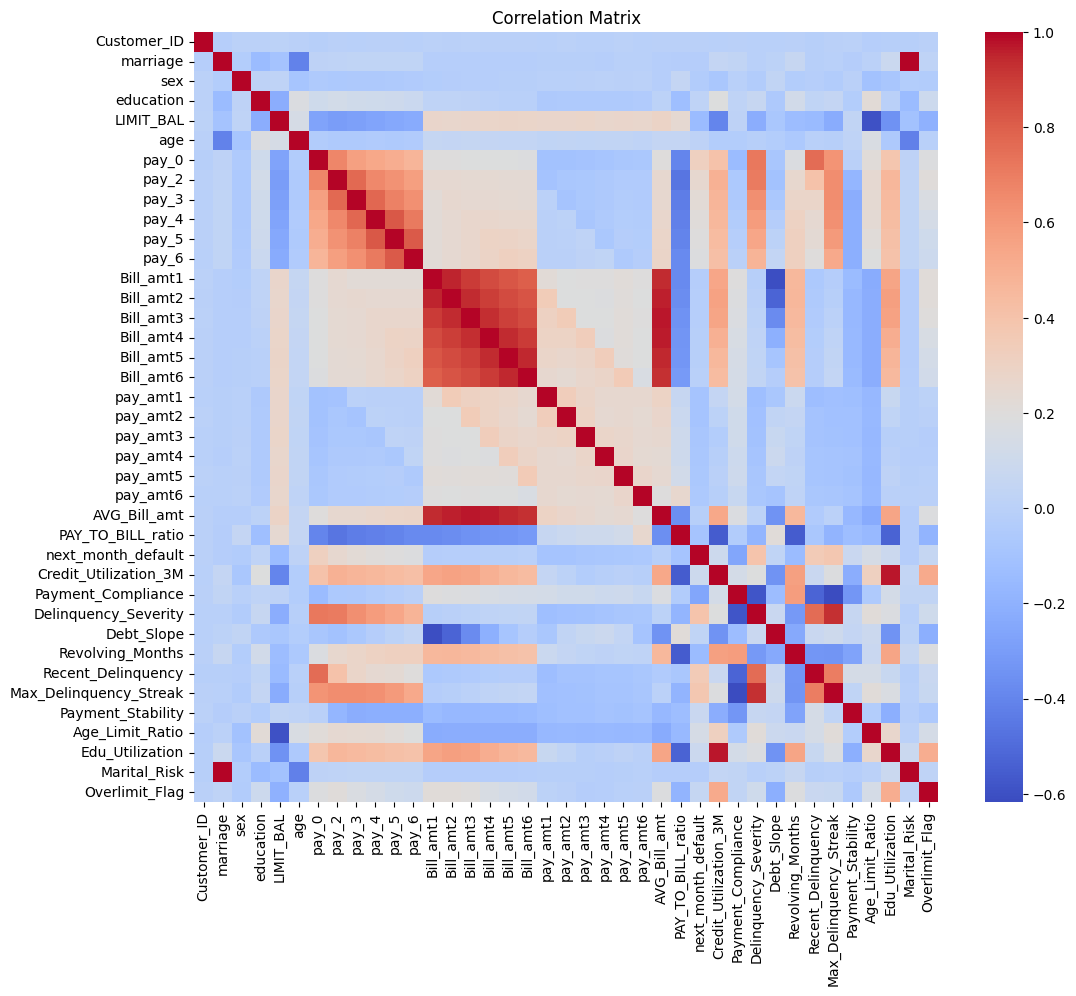

,Feature 1,Feature 2,Correlation
0,marriage,Marital_Risk,1.000000
1,pay_0,Delinquency_Severity,0.719747
2,pay_0,Recent_Delinquency,0.757076
3,pay_2,pay_3,0.766398
4,pay_2,Delinquency_Severity,0.703658
...,...,...,...
61,Recent_Delinquency,pay_0,0.757076
62,Recent_Delinquency,Delinquency_Severity,0.758687
63,Max_Delinquency_Streak,Delinquency_Severity,0.928751
64,Edu_Utilization,Credit_Utilization_3M,0.974718


In [ ]:
# Compute correlation matrix (for numeric features)
corr_matrix = df2.corr()

# Visualize correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated pairs (absolute correlation > 0.7)
high_corr = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.7:
            high_corr.append((i, j, corr_matrix.loc[i, j]))

# Display highly correlated pairs in a table
high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
display(high_corr_df)

In [ ]:
# Correlation with target
target_corr = df2.corr()['next_month_default'].drop('next_month_default')
print(target_corr.sort_values(ascending=False))


Delinquency_Severity      0.399838
Max_Delinquency_Streak    0.380544
Recent_Delinquency        0.355399
pay_0                     0.313244
pay_2                     0.252776
pay_3                     0.226686
pay_4                     0.207973
pay_5                     0.196630
pay_6                     0.180871
Age_Limit_Ratio           0.146738
Credit_Utilization_3M     0.096038
Edu_Utilization           0.086088
Payment_Stability         0.076530
Overlimit_Flag            0.058589
Debt_Slope                0.029628
education                 0.026207
age                       0.017731
Customer_ID              -0.002147
Bill_amt6                -0.006520
Bill_amt5                -0.010877
Bill_amt4                -0.013554
AVG_Bill_amt             -0.016624
Bill_amt3                -0.017811
Bill_amt2                -0.018621
Bill_amt1                -0.024561
marriage                 -0.025934
Marital_Risk             -0.028051
sex                      -0.037522
pay_amt6            

In [ ]:
#drop highly intercorrelated and less correlated with target variable
features_to_drop = [
    'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6','AVG_Bill_amt','marriage',
    'pay_5', 'pay_6','Customer_ID'
]
df3 = df2.drop(features_to_drop, axis=1)
target_corr = df3.corr()['next_month_default'].drop('next_month_default')
print(target_corr.sort_values(ascending=False))

Delinquency_Severity      0.399838
Max_Delinquency_Streak    0.380544
Recent_Delinquency        0.355399
pay_0                     0.313244
pay_2                     0.252776
pay_3                     0.226686
pay_4                     0.207973
Age_Limit_Ratio           0.146738
Credit_Utilization_3M     0.096038
Edu_Utilization           0.086088
Payment_Stability         0.076530
Overlimit_Flag            0.058589
Debt_Slope                0.029628
education                 0.026207
age                       0.017731
Bill_amt1                -0.024561
Marital_Risk             -0.028051
sex                      -0.037522
pay_amt6                 -0.065063
pay_amt5                 -0.070786
pay_amt4                 -0.074727
pay_amt3                 -0.083267
PAY_TO_BILL_ratio        -0.092949
pay_amt2                 -0.095182
pay_amt1                 -0.095708
LIMIT_BAL                -0.146622
Revolving_Months         -0.147707
Payment_Compliance       -0.258885
Name: next_month_def

In [ ]:
# Step 4: Prepare features and target
feature_columns = [col for col in df3.columns if col != 'next_month_default']
X = df3[feature_columns]
y = df3['next_month_default']
X.head()

,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,Bill_amt1,pay_amt1,...,Delinquency_Severity,Debt_Slope,Revolving_Months,Recent_Delinquency,Max_Delinquency_Streak,Payment_Stability,Age_Limit_Ratio,Edu_Utilization,Marital_Risk,Overlimit_Flag
0,0,2,60000,25.0,2,2,2,0,60323.86,2000.21,...,1.5,-9862.802000,3,1,3,0.001397,0.409836,0.523319,0.5,1
1,1,1,290000,24.0,0,0,-2,-2,11157.67,0.00,...,0.0,-1488.314000,3,0,0,0.000885,0.082474,-0.279209,0.5,0
2,0,2,180000,63.0,0,0,0,0,47930.96,2086.94,...,0.0,1058.932571,6,0,0,0.008005,0.348066,-0.190917,0.3,0
3,1,2,210000,43.0,0,0,0,0,91152.44,3348.07,...,0.0,-3268.271714,6,0,0,0.002953,0.203791,-0.026865,0.3,0
4,0,1,280000,32.0,-2,-2,-2,-2,19666.40,999.78,...,0.0,-1993.056571,0,0,0,0.000056,0.113879,-0.263640,0.5,0


Class Distribution (Target Variable 'next_month_default'):
next_month_default
0    0.809562
1    0.190438
Name: proportion, dtype: float64


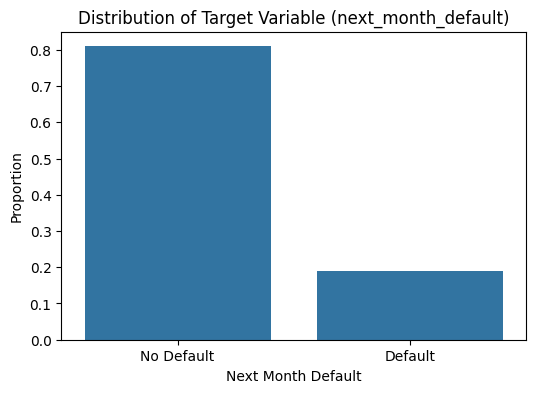

In [ ]:
# prompt: check class imbalance

# Check class imbalance ratio
class_distribution = y.value_counts(normalize=True)
print("Class Distribution (Target Variable 'next_month_default'):")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Target Variable (next_month_default)')
plt.xlabel('Next Month Default')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

In [ ]:
# Check missing values in features
missing_values = X.isnull().sum()
print("Missing values per feature:\n", missing_values[missing_values > 0])

# Check target variable
print("\nMissing values in target:", y.isnull().sum())


Missing values per feature:
 Marital_Risk    53
dtype: int64

Missing values in target: 0


In [ ]:
from sklearn.impute import SimpleImputer

# Impute with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify no missing values remain
print("Remaining missing values:", X.isnull().sum().sum())


Remaining missing values: 0


In [ ]:
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())

Original class distribution:
next_month_default
0    20337
1     4784
Name: count, dtype: int64

After SMOTE:
next_month_default
0    20337
1    12202
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.65)
X_bal, y_bal = under.fit_resample(X_res, y_res)

print("Original class distribution:")
print(y_res.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_bal).value_counts())
print("Class distribution after Random Undersampling:")
print(pd.Series(y_bal).value_counts(normalize=True))


Original class distribution:
next_month_default
0    20337
1    12202
Name: count, dtype: int64

After SMOTE:
next_month_default
0    18772
1    12202
Name: count, dtype: int64
Class distribution after Random Undersampling:
next_month_default
0    0.606057
1    0.393943
Name: proportion, dtype: float64


Class Distribution (Target Variable 'next_month_default'):
next_month_default
0    0.606057
1    0.393943
Name: proportion, dtype: float64


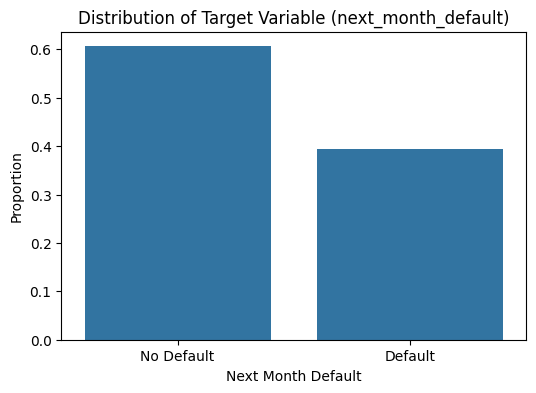

In [ ]:
class_distribution = y_bal.value_counts(normalize=True)
print("Class Distribution (Target Variable 'next_month_default'):")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Target Variable (next_month_default)')
plt.xlabel('Next Month Default')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

In [ ]:
df3.shape

(25121, 29)

In [ ]:
def train_models(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)

    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42),
        'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        from sklearn.metrics import fbeta_score
        f2_score = fbeta_score(y_test, y_pred, beta=2)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        results[name] = {
            'F2_Score': f2_score,
            'AUC_ROC': auc_score,
            'Classification_Report': classification_report(y_test, y_pred)
        }

        print(f"F2 Score: {f2_score:.4f}")
        print(f"AUC-ROC: {auc_score:.4f}")

    return models, results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

models, results = train_models(X_train, y_train, X_test, y_test)


Training Logistic Regression...
F2 Score: 0.5548
AUC-ROC: 0.7846

Training Decision Tree...
F2 Score: 0.7450
AUC-ROC: 0.7796

Training Random Forest...
F2 Score: 0.7940
AUC-ROC: 0.9212

Training XGBoost...
F2 Score: 0.7759
AUC-ROC: 0.9101

Training LightGBM...
F2 Score: 0.7767
AUC-ROC: 0.9136


In [ ]:
def tune_xgboost(X_train, y_train):
    """Hyperparameter tuning for XGBoost"""

    param_grid = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    xgb_model = xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,  # Prevent warnings
        eval_metric='logloss',    # Add evaluation metric
        n_jobs=-1                 # Use all cores
    )

    # Use F2 score as scoring metric
    from sklearn.metrics import make_scorer, fbeta_score
    f2_scorer = make_scorer(fbeta_score, beta=2)

    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=5,
        scoring=f2_scorer,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print("Best F2 score:", grid_search.best_score_)

    return grid_search.best_estimator_

In [ ]:
best_model = tune_xgboost(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
Best F2 score: 0.7744489298821573


In [ ]:
def explain_model_predictions(model, X_test, feature_names):
    """Use SHAP for model interpretability"""

    # Create SHAP explainer
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test.iloc[:100])  # Explain first 100 predictions

    # Summary plot
    shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=feature_names)

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': abs(shap_values.values).mean(axis=0)
    }).sort_values('importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

    return feature_importance

In [ ]:
feature_importance = explain_model_predictions(best_model, X_test, feature_columns)


In [ ]:
def optimize_threshold_for_f2(model, X_val, y_val):
    """Find optimal threshold to maximize F2 score"""

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    thresholds = np.arange(0.1, 0.9, 0.01)
    f2_scores = []

    for threshold in thresholds:
        y_pred_thresh = (y_pred_proba >= threshold).astype(int)
        f2 = fbeta_score(y_val, y_pred_thresh, beta=2)
        f2_scores.append(f2)

    optimal_threshold = thresholds[np.argmax(f2_scores)]
    max_f2_score = max(f2_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f2_scores)
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('F2 Score')
    plt.title('F2 Score vs Classification Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Optimal Threshold: {optimal_threshold:.3f}")
    print(f"Maximum F2 Score: {max_f2_score:.4f}")

    return optimal_threshold

In [ ]:
optimal_threshold = optimize_threshold_for_f2(best_model, X_test, y_test)

In [ ]:
def generate_final_predictions(model, X_validation, threshold=0.5):
    """Generate predictions for submission"""

    # Get probabilities
    y_pred_proba = model.predict_proba(X_validation)[:, 1]

    # Apply threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Create submission dataframe
    submission = pd.DataFrame({
        'Customer': range(1, len(y_pred) + 1),  # Assuming customer IDs start from 1
        'next_month_default': y_pred
    })

    # Save to CSV
    submission.to_csv('submission_[YourEnrollmentNumber].csv', index=False)

    print("Submission file created: submission_[YourEnrollmentNumber].csv")
    print("Prediction distribution:")
    print(pd.Series(y_pred).value_counts())

    return submission

In [ ]:
validation_data = pd.read_csv('validation_data.csv')
validation_engineered = engineer_features(validation_data)
X_validation = validation_engineered[feature_columns]
submission = generate_final_predictions(best_model, X_validation, optimal_threshold)


In [ ]:
def main():
    """Main execution pipeline"""

    # Step 1: Load and explore data
    train_data = load_and_explore_data('train_data.csv')

    # Step 2: EDA
    perform_eda(train_data)

    # Step 3: Feature Engineering
    train_engineered = engineer_features(train_data)

    # Step 4: Prepare features and target
    feature_columns = [col for col in train_engineered.columns if col != 'next_month_default']
    X = train_engineered[feature_columns]
    y = train_engineered['next_month_default']

    # Handle categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    # Step 5: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 6: Handle class imbalance
    X_train_balanced, y_train_balanced = handle_class_imbalance(X_train, y_train, method='smoteenn')

    # Step 7: Train models
    models, results = train_models(X_train_balanced, y_train_balanced, X_test, y_test)

    # Step 8: Hyperparameter tuning for best model (assuming XGBoost)
    best_model = tune_xgboost(X_train_balanced, y_train_balanced)

    # Step 9: Model interpretability
    feature_importance = explain_model_predictions(best_model, X_test, feature_columns)

    # Step 10: Threshold optimization
    optimal_threshold = optimize_threshold_for_f2(best_model, X_test, y_test)

    # Step 11: Load validation data and generate predictions
    # validation_data = pd.read_csv('validation_data.csv')
    # validation_engineered = engineer_features(validation_data)
    # X_validation = validation_engineered[feature_columns]
    # submission = generate_final_predictions(best_model, X_validation, optimal_threshold)

    print("Pipeline completed successfully!")

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.csv'

# Task
The provided code attempts to apply SMOTE to a dataset containing categorical features without proper preprocessing, leading to an error. Your task is to identify the categorical features, apply one-hot encoding to them, and then apply SMOTE to the preprocessed data. Finally, print the class distribution before and after applying SMOTE to demonstrate the effect of the oversampling.

## Identify categorical features

### Subtask:
Identify the columns in the DataFrame `X` that have a non-numerical data type.


**Reasoning**:
Identify the columns in the DataFrame X that have a non-numerical data type using .select_dtypes() and store the names of these columns in categorical_features, then print the list of categorical features.



In [ ]:
def engineer_features(df):
    """Create financially meaningful features"""

    df_engineered = df.copy()

    # 1. Credit Utilization Ratio
    bill_cols = ['Bill_amt1','Bill_amt2','Bill_amt1','Bill_amt4','Bill_amt5','Bill_amt6']
    df_engineered['Credit_Utilization'] = df_engineered['AVG_Bill_amt'] / df_engineered['LIMIT_BAL']
    df_engineered['Credit_Utilization'] = df_engineered['Credit_Utilization'].clip(0, 2)  # Cap at 200%

    # 2. Payment Consistency Score (lower is better)
    payment_cols = ['pay_0', 'pay_2','pay_3','pay_4','pay_5','pay_6']
    df_engineered['Payment_Consistency'] = df_engineered[payment_cols].std(axis=1)

    # 3. Delinquency Streak (maximum consecutive months of payment delay)
    df_engineered['Max_Delinquency_Streak'] = 0
    for _, row in df_engineered.iterrows():
        streak = 0
        max_streak = 0
        for col in payment_cols:
            if row[col] > 0:  # Payment delay
                streak += 1
                max_streak = max(max_streak, streak)
            else:
                streak = 0
        df_engineered.loc[_, 'Max_Delinquency_Streak'] = max_streak

    # 4. Recent Payment Behavior (weighted average of recent payments)
    weights = [0.4, 0.3, 0.2, 0.1, 0.0, 0.0]  # More weight on recent months
    df_engineered['Weighted_Payment_Score'] = sum(w * df_engineered[col] for w, col in zip(weights, payment_cols))

    # 5. Payment Amount Stability
    pay_amt_cols = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']
    df_engineered['Payment_Volatility'] = df_engineered[pay_amt_cols].std(axis=1) / (df_engineered[pay_amt_cols].mean(axis=1) + 1)

    # 6. Age Risk Categories
    bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 80]
    labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

    df_engineered['AGE_BIN'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

    # 7. Credit Limit Categories
    df_engineered['Credit_Limit_Category'] = pd.qcut(df_engineered['LIMIT_BAL'],
                                                     q=4, labels=['Low', 'Medium', 'High', 'Premium'])

    # 8. Interaction Features
    df_engineered['Credit_Age_Interaction'] = df_engineered['LIMIT_BAL'] * df_engineered['age']
    df_engineered['Utilization_Age_Interaction'] = df_engineered['Credit_Utilization'] * df_engineered['age']

    print("Engineered Features Created:")
    new_features = ['Credit_Utilization', 'Payment_Consistency', 'Max_Delinquency_Streak',
                   'Weighted_Payment_Score', 'Payment_Volatility', 'AGE_BIN',
                   'Credit_Limit_Category', 'Credit_Age_Interaction', 'Utilization_Age_Interaction']
    print(new_features)

    return df_engineered